# **Gold Price Data**

## **About Dataset**

Data Overview: This data file is a Comma separated value file format with 2290 rows and 7 columns. It contains 5 columns which are numerical in datatype and one column in Date format. Clearly the data shows value of the variables **SPX,GLD,USO,SLV,EUR/USD** against the dates in the date column.


#**Import the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

#**Data Collecction and Preprocessing**

In [2]:
# Loading the dataset into a pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')  # Use this to identify issues

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
gold_data.head()


First 5 rows of the dataset:


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [10]:
# Display the last few rows
print("Last 5 rows of the dataset:")
gold_data.tail()


Last 5 rows of the dataset:


,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# Checking the shape of the dataset
gold_data.shape    # Outputs the number of rows and columns in the dataset.

(2290, 6)

In [6]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
gold_data.describe()


Statistical Description of the Dataset:


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [7]:
# Check for missing values
missing_values = gold_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64


In [11]:
# Geerating some Information about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


**Correlation**

In [16]:
# Drop or Exclude Non-Numeric Columns
numeric_data = gold_data.select_dtypes(include=['float64', 'int64'])

# Checking the correlation of the dataset
corr = numeric_data.corr()
print(corr)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


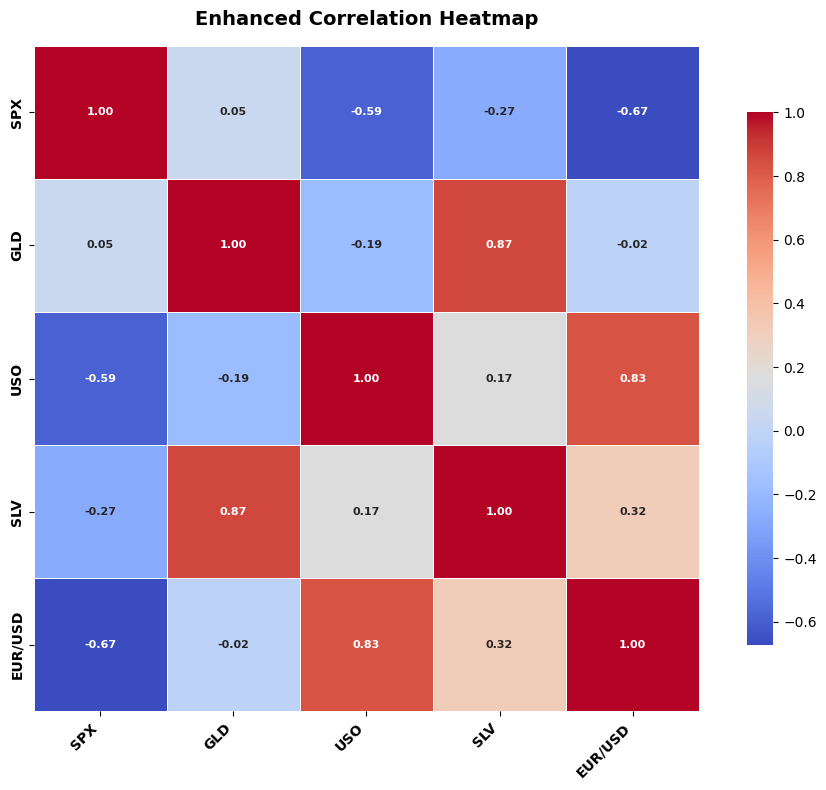

In [17]:
# Create the heatmap with enhancements
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=14, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

In [18]:
# Correlations value of GLD
corr_value = corr["GLD"].sort_values(ascending=False)
corr_value

,GLD
GLD,1.000000
SLV,0.866632
SPX,0.049345
EUR/USD,-0.024375
USO,-0.186360


<ipython-input-21-5b21f51b4f5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

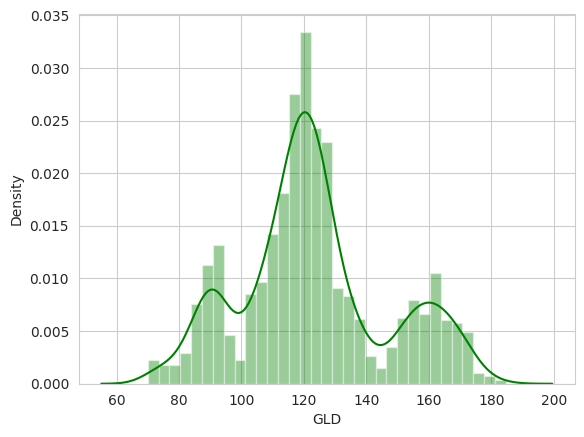

In [21]:
# Checking the distribution of GLD price
sns.distplot(gold_data['GLD'],color='green')

# Splitting features and target

In [24]:
# Splitting features and target
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [25]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
           SPX        USO     SLV   EUR/USD
0  1447.160034  78.470001  15.180  1.471692
1  1447.160034  78.370003  15.285  1.474491
2  1411.630005  77.309998  15.167  1.475492
3  1416.180054  75.500000  15.053  1.468299
4  1390.189941  76.059998  15.590  1.557099

Target (y):
0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64


# **Splitting the dataset into Training and Test sets**

In [26]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 2290, Training samples: 1832, Test samples: 458


In [27]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


# **Model Training**

In [29]:
# Initialize the model
randforR_model = RandomForestRegressor(n_estimators=100, random_state=3)

In [31]:
# Training the RandomForestRegressor model with train data
randforR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=3)

#**Model Evaluation**

In [32]:
# Evaluate on Training Data
training_data_prediction = randforR_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.9985
Mean Absolute Error: 0.4855


In [33]:
# Evaluate on Test Data
test_data_prediction = randforR_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.9851
Mean Absolute Error: 1.3841


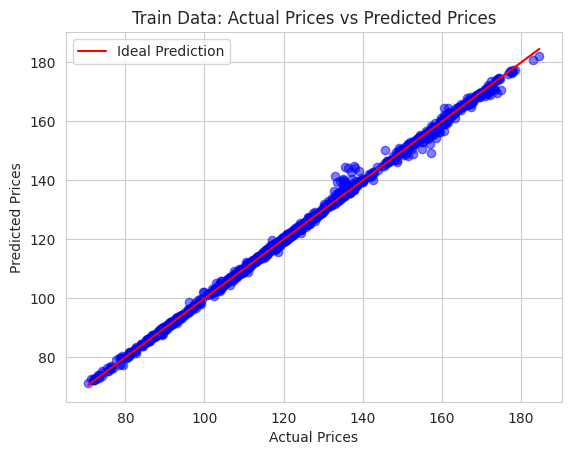

In [34]:
# Scatter Plot for Train Data
plt.scatter(y_train, training_data_prediction, alpha=0.5, color='blue')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Train Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_train), max(training_data_prediction))
min_val = min(min(y_train), min(training_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


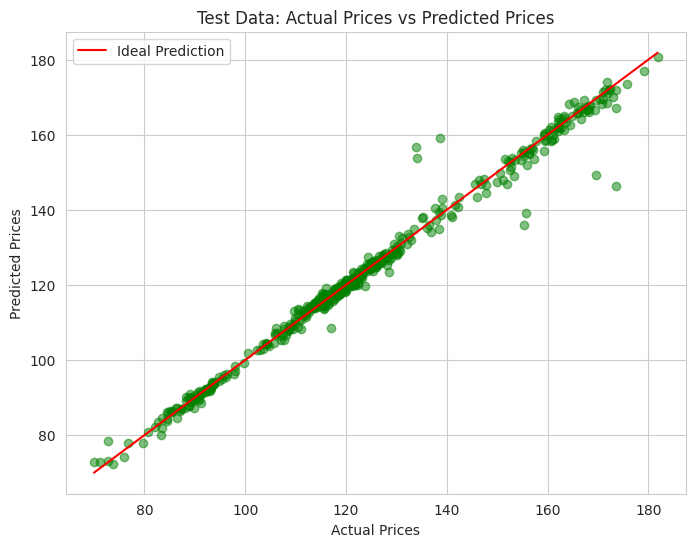

In [35]:
# Scatter Plot for Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, test_data_prediction, alpha=0.5, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Test Data: Actual Prices vs Predicted Prices")

# Add Ideal Prediction Line
max_val = max(max(y_test), max(test_data_prediction))
min_val = min(min(y_test), min(test_data_prediction))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Prediction')
plt.legend()
plt.show()


# Compare the Actual Values and Predicted Values with Plot

In [36]:
#  Convert y_test to a list
y_test_list = list(y_test)

# Convert test_data_prediction to a list
test_data_prediction_list = list(test_data_prediction)

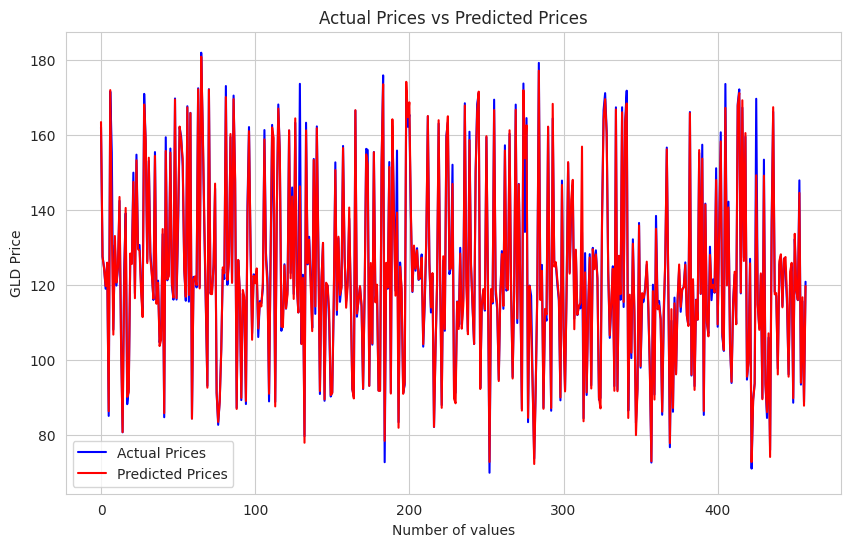

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_list, label='Actual Prices', color='blue')
plt.plot(test_data_prediction_list, label='Predicted Prices', color='red')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.title('Actual Prices vs Predicted Prices')
plt.legend()
plt.show()

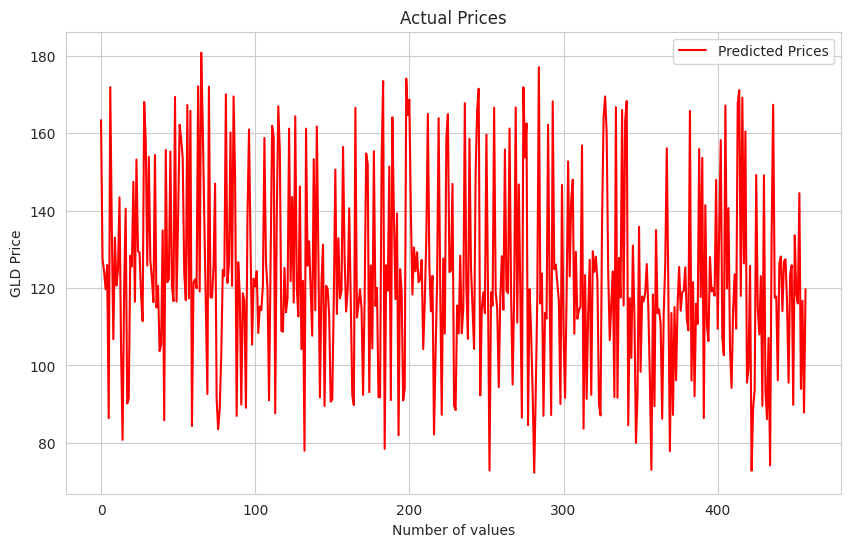

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(test_data_prediction_list, label='Predicted Prices', color='red')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.title('Actual Prices')
plt.legend()
plt.show()